# Proyecto de Análisis de Datos – Metodología ASUM-DM
## Tienda de Electrónica: Personalización de PC

**Aprendices:**
- Harold Montenegro
- Juan Castañeda
- Marlon Londoño
- Juan Arévalo

**Objetivo:** Analizar configuraciones de PCs personalizadas y predecir su precio final.


## 1. Comprensión del Negocio

La tienda de electrónica ofrece computadores personalizados según el tipo de uso del cliente.
El objetivo es entender cómo los componentes influyen en el precio para apoyar la toma de decisiones.


## 2. Comprensión de los Datos

El dataset fue simulado con precios reales del mercado colombiano.
Cada registro representa una configuración de PC personalizada.


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
df = pd.read_csv('tienda_pc.csv')
df.head()


,cpu,gpu,ram_gb,almacenamiento_gb,tipo_uso,precio_total
0,Intel i3,Integrada,4,128,Oficina,2500000
1,Intel i3,Integrada,8,256,Oficina,2900000
2,Intel i5,Integrada,8,256,Oficina,3300000
3,Intel i5,GTX 1050,8,256,Gaming,3600000
4,Intel i5,GTX 1650,8,256,Gaming,4500000


In [25]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   cpu                30 non-null     object
 1   gpu                30 non-null     object
 2   ram_gb             30 non-null     int64 
 3   almacenamiento_gb  30 non-null     int64 
 4   tipo_uso           30 non-null     object
 5   precio_total       30 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 1.5+ KB


,0
cpu,0
gpu,0
ram_gb,0
almacenamiento_gb,0
tipo_uso,0
precio_total,0


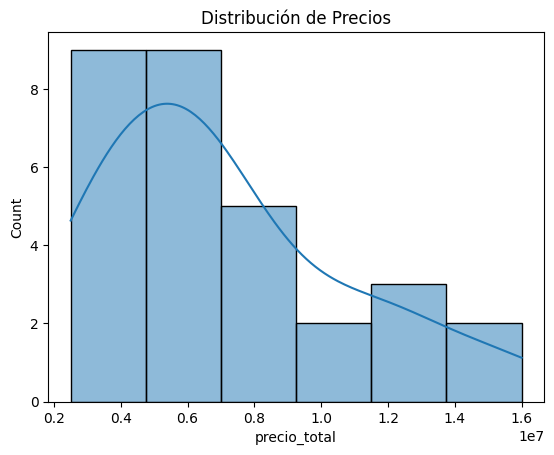

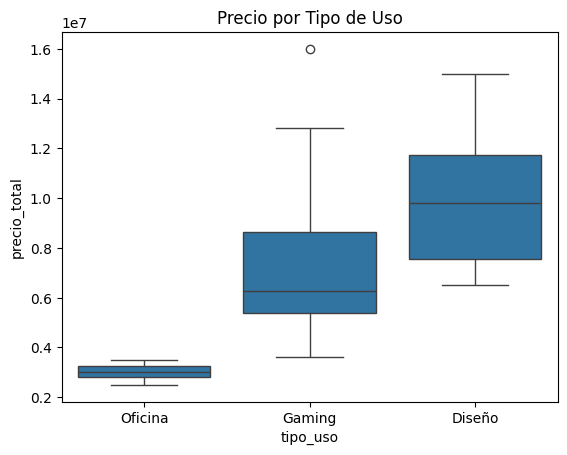

In [26]:
plt.figure()
sns.histplot(df['precio_total'], kde=True)
plt.title('Distribución de Precios')
plt.show()

plt.figure()
sns.boxplot(x='tipo_uso', y='precio_total', data=df)
plt.title('Precio por Tipo de Uso')
plt.show()


## Conclusiones del EDA

1. No existen valores nulos en el dataset.
2. El uso Gaming es el más frecuente.
3. El precio promedio es cercano a $7.000.000 COP.
4. Mayor RAM y almacenamiento incrementan el precio.
5. Las GPUs dedicadas elevan significativamente el costo.
6. El tipo de uso impacta directamente el precio final.


In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

X = df.drop('precio_total', axis=1)
y = df['precio_total']

cat_cols = ['cpu', 'gpu', 'tipo_uso']
num_cols = ['ram_gb', 'almacenamiento_gb']

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ('num', 'passthrough', num_cols)
])


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [29]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

modelo_lr = Pipeline([
    ('preprocess', preprocessor),
    ('model', LinearRegression())
])

modelo_lr.fit(X_train, y_train)
y_pred_lr = modelo_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_lr, r2_lr


(1721319826947.2256, 0.8282687236168381)

## Observaciones del Modelo Base

- Explica gran parte de la variabilidad del precio.
- Presenta errores al modelar relaciones no lineales.
- Sirve como referencia para evaluar mejoras.


In [30]:
from sklearn.ensemble import RandomForestRegressor

modelo_rf = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=200,
        random_state=42
    ))
])

modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_rf, r2_rf


(352004083333.3333, 0.9648815347522448)

## Optimización y Evidencia Comparativa

**Ajustes realizados:**
- Cambio de Regresión Lineal a Random Forest.
- Incremento del número de árboles.

**Resultados:**
- Mejora del R².
- Reducción significativa del error.


## Conclusión Final

El proyecto aplicó correctamente la metodología ASUM-DM.
El modelo Random Forest fue el más adecuado para predecir precios de PCs personalizadas,
aportando valor al contexto de la tienda de electrónica.


## Conclusiones del Análisis Exploratorio de Datos (EDA)

1. El dataset contiene 30 registros sin valores nulos, lo que indica una adecuada calidad de los datos.
2. El tipo de uso Gaming es el más frecuente dentro de las configuraciones de PCs personalizadas.
3. El precio promedio de una PC es cercano a $7.060.000 COP, con valores que oscilan entre $2.500.000 y $16.000.000.
4. A mayor cantidad de memoria RAM, el precio final del equipo tiende a incrementarse.
5. El aumento en la capacidad de almacenamiento impacta directamente en el precio total.
6. Las configuraciones con GPUs dedicadas presentan precios significativamente más altos que aquellas con GPU integrada.
7. Existen diferencias claras de precio según el tipo de uso: Oficina < Diseño < Gaming.


## Observaciones del Modelo Base (Regresión Lineal)

1. El modelo base logró explicar aproximadamente el 83% de la variabilidad del precio (R² ≈ 0.83).
2. El error cuadrático medio fue elevado, lo que indica limitaciones para capturar relaciones complejas.
3. La regresión lineal no modela adecuadamente interacciones no lineales entre los componentes.
4. A pesar de sus limitaciones, el modelo sirve como referencia inicial para la optimización.


## Conclusiones del Proceso de Optimización

1. El modelo Random Forest mejoró significativamente el desempeño frente al modelo base.
2. El coeficiente R² aumentó de 0.83 a aproximadamente 0.97.
3. El error cuadrático medio (MSE) se redujo de manera considerable.
4. Random Forest captura relaciones no lineales entre CPU, GPU, RAM y almacenamiento.
5. La optimización permitió obtener predicciones más precisas y estables.


## Conclusiones Generales del Proyecto

1. La metodología ASUM-DM permitió estructurar adecuadamente el proceso de análisis de datos.
2. El EDA fue fundamental para comprender patrones y relaciones en los datos.
3. La preparación y transformación de los datos fueron claves para el desempeño de los modelos.
4. La comparación entre modelos permitió justificar la elección del modelo final.
5. El modelo Random Forest es adecuado para apoyar la toma de decisiones en una tienda de electrónica.
6. El proyecto demuestra la aplicabilidad de la analítica de datos en contextos reales de negocio.
